In [30]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
data = load_iris()

In [3]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# defining X and Y
X = data.data
y = data.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Without preprocessing and transforming/normalizing

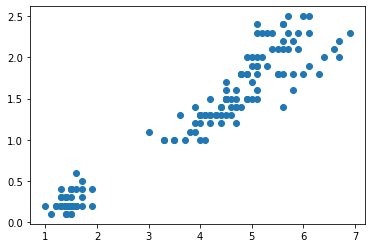

In [6]:
plt.figure()
plt.scatter(X[:, 2], X[:, 3])

In [8]:
model1 = SGDClassifier()
model1.fit(X_train, y_train)

SGDClassifier()

In [21]:
model1.predict(X_test)

array([0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 1, 2, 2, 2])

In [9]:
model1.score(X_test, y_test)

0.7666666666666667

## Using transformer and normalizer / preprocessing

In [12]:
# Normalizer
scaler = StandardScaler()

X_train_trans = scaler.fit_transform(X_train)

In [14]:
#estimate
model2 = SGDClassifier()
model2.fit(X_train_trans, y_train)

SGDClassifier()

In [15]:
# normalize X_test

X_test_trans = scaler.fit_transform(X_test)

In [17]:
model2.predict(X_test_trans)

array([0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0,
       2, 1, 2, 2, 1, 2, 2, 1])

In [18]:
model2.score(X_test_trans, y_test)

0.9333333333333333

## Using Pipeline 

In [25]:
#make the pipeline
pipe = make_pipeline(StandardScaler(), SGDClassifier())

In [26]:
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [27]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [28]:
pipe.predict(X_test)

array([0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0,
       2, 2, 2, 2, 1, 2, 2, 1])

In [29]:
pipe.score(X_test, y_test)

0.9

### using gridsearchCV

In [34]:
model3 = make_pipeline(PolynomialFeatures(), 
                        StandardScaler(), 
                        SGDClassifier(random_state=0))

                        
model3

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [40]:
params = {
    'polynomialfeatures__degree': [2, 3, 4],
    'sgdclassifier__penalty': ['l1', 'l2']
}

In [41]:
grid = GridSearchCV(model3, param_grid=params, cv=4)

In [42]:
grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [43]:
grid.predict(X_test)

array([0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0,
       2, 1, 2, 2, 1, 2, 2, 1])

In [44]:
grid.score(X_test, y_test)

0.9666666666666667

In [46]:
grid.best_params_

{'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'l2'}

In [48]:
grid.best_score_

0.9833333333333334

In [49]:
grid.best_estimator_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])